# Project executive summary

I set out to try to predict musicians' income from a range of given information. The goal was to determine whether such a things is predictable, and if so, suggest some variables for further investigation which could empower musicians to maximise their income.

Whilst I was able to find some correlations through EDA, the machine learning models I trained were unable to make accurate predictions.

I believe I may be able to improve the models with further work. There may well be meaningful patterns in the data which I was so far unable to unearth, perhaps owing to the complexity of the dataset and the number of features.

As a next step, I would focus on feature-selection before training further models.

## The Challenge
Music is perceived as a difficult profession in which to earn money or predict future income. This project aims to identify whether it is possible to predict the income of a musician from the available data, and if so, what features are most predictive.

This could form hypothesis generation for further investigation into how a musician could maximise their income, and/or provide information for expectation management which I believe is important for anyone considering a career in music.

## Dataset overview

A dataset containing information on musicians' self-reported activities and income in the UK. This particularly focuses on income generated in 2018-2020. It also contains rich information about the division of income across a wide range of different possible sources. The data was collected with concern for how streaming has affected musicians' income, but the data could be used to draw other connections given the breadth of the questions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#How big is the dataframe?

df_musicians = pd.read_csv('UK_Creators__Earnings_Survey_Raw_Data.csv')
print(len(df_musicians.axes[0]))
print(len(df_musicians.axes[1]))

710
228


In [3]:
df_musicians.head()

,210409 UK Creators' Earnings Survey,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 218,Unnamed: 219,Unnamed: 220,Unnamed: 221,Unnamed: 222,Unnamed: 223,Unnamed: 224,Unnamed: 225,Unnamed: 226,Unnamed: 227
0,A1a_1,A1a_2,A1a_3,A1a_4,A1a_5,A1a_6,A1a_7,A1a_8,A1a_9,A1a_8_TEXT,...,A3_57,A3_55_TEXT,A3_56_TEXT,A3_57_TEXT,F1,F1_4_TEXT,F2,F3,F4,F5
1,Which of the following describe you as a music...,Which of the following describe you as a music...,Which of the following describe you as a music...,Which of the following describe you as a music...,Which of the following describe you as a music...,Which of the following describe you as a music...,Which of the following describe you as a music...,Which of the following describe you as a music...,Which of the following describe you as a music...,Which of the following describe you as a music...,...,We recognise that no genre list is comprehensi...,We recognise that no genre list is comprehensi...,We recognise that no genre list is comprehensi...,We recognise that no genre list is comprehensi...,Are you... - Selected Choice,Are you... - Prefer to self describe - Text,How would you describe your ethnic origin(s)?,What is the highest level of education you hav...,Approximately how many followers do you have a...,When you upload a piece of music to a streamin...
2,Songwriter/Composer,Vocalist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Other genre – Please state,NaN,NaN,Ska,Female,NaN,White British,Secondary School,I am not active on any social media platforms,NaN
3,Songwriter/Composer,Vocalist,Instrumentalist,NaN,NaN,NaN,Engineer,NaN,NaN,NaN,...,Other genre – Please state,NaN,NaN,Punk,Male,NaN,White British,Secondary School,101-1000,1000-10000
4,Songwriter/Composer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,NaN,White British,Secondary School,"1001-10,000",100-1000


### Initial observations

In [4]:
'''

starting with 228 columns. May need to condense that to a more sensible amount
710 rows is fine
The top two rows don't contain useful information. Drop them
The second row contains the useful information. Is the first column a dummy column?
There might be a way algorithmically to rename the columns better.

In terms of the columns, this is actually quite well set up for one hot encoding already

'''

"\n\nstarting with 228 columns. May need to condense that to a more sensible amount\n710 rows is fine\nThe top two rows don't contain useful information. Drop them\nThe second row contains the useful information. Is the first column a dummy column?\nThere might be a way algorithmically to rename the columns better.\n\nIn terms of the columns, this is actually quite well set up for one hot encoding already\n\n"

In [5]:
#drop the top two rows and make the third row the title row
df_musicians.columns = df_musicians.iloc[1]
df_musicians = df_musicians[2:]

In [6]:
#what does the first column really contain?
print('null values: ', df_musicians.iloc[:, 0].isnull().sum())
#print('null values: ', df_musicians['title'].isnull().sum())
#print(df_musicians[1].value_counts())

null values:  317


In [7]:
#It's a valid column, keep it

In [8]:
#I've now made this redundant by sorting the column names out earlier on

#setting the column to display full width so that I can see what they contain properly
#reset this with: 'pd.reset_option('all')'
#These are all of the actual column names

'''
pd.set_option('display.max_colwidth', None)
df_column_names = df_musicians.iloc[1]
'''

"\npd.set_option('display.max_colwidth', None)\ndf_column_names = df_musicians.iloc[1]\n"

In [9]:
#this gives me a full non-truncated list of the columns so I can work out what's there and how to treat it

df_column_names = df_musicians.columns
print(df_column_names.values)

['Which of the following describe you as a music creator? - Selected Choice - Songwriter/Composer'
 'Which of the following describe you as a music creator? - Selected Choice - Vocalist'
 'Which of the following describe you as a music creator? - Selected Choice - Instrumentalist'
 'Which of the following describe you as a music creator? - Selected Choice - Producer'
 'Which of the following describe you as a music creator? - Selected Choice - DJ'
 'Which of the following describe you as a music creator? - Selected Choice - Rapper/MC'
 'Which of the following describe you as a music creator? - Selected Choice - Engineer'
 'Which of the following describe you as a music creator? - Selected Choice - Other (Please specify)'
 "Which of the following describe you as a music creator? - Selected Choice - None, I'm not a music creator"
 'Which of the following describe you as a music creator? - Other (Please specify) - Text'
 'And which would you consider to be your main focus? - Selected Choi

## This section was cut

This section contained code which let me find the column groupings to split out, which it achieved. It occupied a lot of space and, once used, wasn't necesesary to run each time.

***

---

## Continue to run from here

In [10]:
#rename non-unique columns in the original dataframe
df_musicians.columns.values[38] = f'{df_musicians.columns.values[38]} 1'
df_musicians.columns.values[210] = f'{df_musicians.columns.values[210]} 1'
df_musicians.columns.values[220] = f'{df_musicians.columns.values[220]} 2'

In [11]:
#These are the large column groupings

df_cat_1_creatortype = df_musicians.iloc[:,0:10]
df_cat_2_careerregion = df_musicians.iloc[:,15:23]
df_cat_3_collaboration = df_musicians.iloc[:,23:29]
df_cat_4_labelrelationship = df_musicians.iloc[:,31:38]
df_cat_5_inactiveyears = df_musicians.iloc[:,41:84]
df_cat_6_incomesourcepercentage = df_musicians.iloc[:,95:114]
df_cat_7_incomesourcespre2015 = df_musicians.iloc[:,114:133]
df_cat_8_recordfunding = df_musicians.iloc[:,135:146]
df_cat_9_selfdistributionmethod = df_musicians.iloc[:,148:153]
df_cat_10_platformsuploadedto = df_musicians.iloc[:,159:177]
df_cat_11_creatorrole = df_musicians.iloc[:,177:184]
df_cat_12_genre = df_musicians.iloc[:,193:222]

In [12]:
# I only want any data where there is a value, I don't need the NaN values
# Are there any columns that are all NaN?
# the 'None' column in the creatortype category can be dropped, as all values are NaN
# The 'Other' column seems like it could be tricky. What's in that?
df_cat_1_creatortype.isnull().sum()
other_values = df_cat_1_creatortype['Which of the following describe you as a music creator? - Other (Please specify) - Text'].dropna()
other_values

13                                            Teacher
111                                      Videographer
177                                     Live-Streamer
210                      Retired Instrumental Teacher
245                                          Retailer
247                                       improvisor 
273                                 Creative Director
345                                Independent Artist
383    Content producer (podcasts / live stream etc) 
470                                  instrument tutor
473                                           Artist 
478    I am a band member who produces original music
552                            vocalist / songwriter 
599                                           Starter
667                                           Remixer
Name: Which of the following describe you as a music creator? - Other (Please specify) - Text, dtype: object

In [13]:
#They're all different, so I think I'll just have an 'other' category but won't be more specific than that.

### This is the final code to drop all columns that have been broken out

In [14]:
#this reduces the number of columns from 228 to 46

all_intersections_dict = {}
all_intersections_list = []
df_musicians_copy = df_musicians.copy(deep=True)

all_intersections_dict['cat1intersect'] = df_musicians_copy.columns.intersection(df_cat_1_creatortype.columns)
all_intersections_dict['cat2intersect'] = df_musicians_copy.columns.intersection(df_cat_2_careerregion.columns)
all_intersections_dict['cat3intersect'] = df_musicians_copy.columns.intersection(df_cat_3_collaboration.columns)
all_intersections_dict['cat4intersect'] = df_musicians_copy.columns.intersection(df_cat_4_labelrelationship.columns)
all_intersections_dict['cat5intersect'] = df_musicians_copy.columns.intersection(df_cat_5_inactiveyears.columns)
all_intersections_dict['cat6intersect'] = df_musicians_copy.columns.intersection(df_cat_6_incomesourcepercentage.columns)
all_intersections_dict['cat7intersect'] = df_musicians_copy.columns.intersection(df_cat_7_incomesourcespre2015.columns)
all_intersections_dict['cat8intersect'] = df_musicians_copy.columns.intersection(df_cat_8_recordfunding.columns)
all_intersections_dict['cat9intersect'] = df_musicians_copy.columns.intersection(df_cat_9_selfdistributionmethod.columns)
all_intersections_dict['cat10intersect'] = df_musicians_copy.columns.intersection(df_cat_10_platformsuploadedto.columns)
all_intersections_dict['cat11intersect'] = df_musicians_copy.columns.intersection(df_cat_11_creatorrole.columns)
all_intersections_dict['cat12intersect'] = df_musicians_copy.columns.intersection(df_cat_12_genre.columns)

for i in all_intersections_dict:
    for k in all_intersections_dict[i]:
        all_intersections_list.append(k)
        
df_musicians_copy.drop(columns=all_intersections_list, inplace=True)
print(len(df_musicians_copy.axes[1]))

46


I now have dataframes of all of the large column categories:

df_cat_1_creatortype  
df_cat_2_careerregion  
df_cat_3_collaboration  
df_cat_4_labelrelationship  
df_cat_5_inactiveyears  
df_cat_6_incomesourcepercentage  
df_cat_7_incomesourcespre2015  
df_cat_8_recordfunding  
df_cat_9_selfdistributionmethod  
df_cat_10_platformsuploadedto  
df_cat_11_creatorrole  
df_cat_12_genre  

And a dataframe without all of those columns:

df_musicians_copy


In [196]:
'''
get rid of unecessary columns in the sub-dataframes, and one-hot encode
'''

'\nget rid of unecessary columns in the sub-dataframes, and one-hot encode\n'

In [16]:
#just to check that all of the 'others' are captured in column seven, so I can drop column 8
print(df_cat_1_creatortype['Which of the following describe you as a music creator? - Selected Choice - Other (Please specify)'].isnull().sum())
print(df_musicians['Which of the following describe you as a music creator? - Selected Choice - Other (Please specify)'].isnull().sum())

693
693


In [17]:
#get rid of the last two columns
#rename the remaining columns
#reset the index to be correct

cat_1_titles = ['Songwriter/Composer', 'Vocalist', 'Instrumentalist', 'Producer', 'DJ', 'Rapper/MC', 'Engineer', 'Other']
df_cat_1_creatortype.drop(columns=['Which of the following describe you as a music creator? - Selected Choice - None, I\'m not a music creator', 'Which of the following describe you as a music creator? - Other (Please specify) - Text'], inplace=True)
df_cat_1_creatortype.columns = cat_1_titles
df_cat_1_creatortype.index = range(len(df_cat_1_creatortype.index))


C:\Users\Mote\AppData\Local\Temp\ipykernel_10476\1721721134.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat_1_creatortype.drop(columns=['Which of the following describe you as a music creator? - Selected Choice - None, I\'m not a music creator', 'Which of the following describe you as a music creator? - Other (Please specify) - Text'], inplace=True)


In [18]:
df_cat_1_creatortype_OH = pd.get_dummies(df_cat_1_creatortype)
df_cat_1_creatortype_OH.columns = cat_1_titles
df_cat_1_creatortype_OH

,Songwriter/Composer,Vocalist,Instrumentalist,Producer,DJ,Rapper/MC,Engineer,Other
0,1,1,0,0,0,0,0,0
1,1,1,1,0,0,0,1,0
2,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,1,0
4,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...
703,0,0,1,0,0,0,0,0
704,1,0,0,0,0,0,0,0
705,1,0,0,0,0,0,0,0
706,1,0,0,0,0,0,0,0


In [19]:
df_cat_2_careerregion.isnull().sum()
#disregarding this as it is almost all null

1
Which of the following countries/regions is your music career based in (i.e. where you earn money from your music)? \nYou can select more than one option. - Africa                       708
Which of the following countries/regions is your music career based in (i.e. where you earn money from your music)? \nYou can select more than one option. - Asia                         708
Which of the following countries/regions is your music career based in (i.e. where you earn money from your music)? \nYou can select more than one option. - Australia and New Zealand    708
Which of the following countries/regions is your music career based in (i.e. where you earn money from your music)? \nYou can select more than one option. - Europe (excluding UK)        707
Which of the following countries/regions is your music career based in (i.e. where you earn money from your music)? \nYou can select more than one option. - South America                708
Which of the following countries/regions is your

In [20]:
df_cat_3_collaboration
cat_3_titles = ['Collab - Solo artist', 'Collab - Duo member', 'Collab - Trio member', 'Collab - Band member', 'Collab - Ensemble/group member', 'Collab - Other']
df_cat_3_collaboration.index = range(len(df_cat_3_collaboration.index))
df_cat_3_collaboration_OH = pd.get_dummies(df_cat_3_collaboration)
df_cat_3_collaboration_OH.columns = cat_3_titles
df_cat_3_collaboration.columns = cat_3_titles
df_cat_3_collaboration_OH

,Collab - Solo artist,Collab - Duo member,Collab - Trio member,Collab - Band member,Collab - Ensemble/group member,Collab - Other
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,0,0,0,0,0,0
3,1,0,0,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
703,0,0,0,1,0,0
704,0,0,0,0,0,0
705,0,0,0,0,0,0
706,0,0,0,0,0,0


In [21]:
df_cat_4_labelrelationship.head()
cat_4_titles = ['Signed to major label', 'Signed to indie label', 'Previously signed to major', 'Previously signed to indie', 'Self-release\DIY', 'Label relationship - Other', 'Other - text']
#The Other - Text column contains interesting information but can't be one hot encoded

df_cat_4_labelrelationship.index = range(len(df_cat_4_labelrelationship.index))


df_cat_4_labelrelationship.columns = cat_4_titles
df_cat_4_labelrelationship_OH = pd.get_dummies(df_cat_4_labelrelationship.iloc[:,:6])
df_cat_4_labelrelationship_OH.columns = cat_4_titles[:6]


In [22]:
#To create a years titles list, I should automatically generate a list with a range of years
years_list = []
for year in range(1980, 2021 +1):
    years_list.append(year)
    
cat_5_titles = ['pre-1980']+years_list

df_cat_5_inactiveyears.index = range(len(df_cat_5_inactiveyears.index))

df_cat_5_inactiveyears_OH = pd.get_dummies(df_cat_5_inactiveyears)
df_cat_5_inactiveyears_OH.columns = cat_5_titles
df_cat_5_inactiveyears_OH.head()

#It would be nice to create a more condensed measure of inactivity that considers both recency and total years
#aggregate inactive years together into bins

,pre-1980,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [23]:
inactiveyears_1980_84 = df_cat_5_inactiveyears_OH.loc[:,1980:1984].sum(axis=1)
inactiveyears_1985_89 = df_cat_5_inactiveyears_OH.loc[:,1985:1989].sum(axis=1)
inactiveyears_1990_94 = df_cat_5_inactiveyears_OH.loc[:,1990:1994].sum(axis=1)
inactiveyears_1995_99 = df_cat_5_inactiveyears_OH.loc[:,1995:1999].sum(axis=1)
inactiveyears_2000_04 = df_cat_5_inactiveyears_OH.loc[:,2000:2004].sum(axis=1)
inactiveyears_2005_09 = df_cat_5_inactiveyears_OH.loc[:,2005:2009].sum(axis=1)
inactiveyears_2010_14 = df_cat_5_inactiveyears_OH.loc[:,2010:2014].sum(axis=1)
inactiveyears_2015_21 = df_cat_5_inactiveyears_OH.loc[:,2015:2021].sum(axis=1)

inactiveyears_totals = [
    df_cat_5_inactiveyears_OH['pre-1980'],
    inactiveyears_1980_84,
    inactiveyears_1985_89,
    inactiveyears_1990_94,
    inactiveyears_1995_99,
    inactiveyears_2000_04,
    inactiveyears_2005_09,
    inactiveyears_2010_14,
    inactiveyears_2015_21
]

inactiveyears_titles = ['Inactive years - Pre-1980','Inactive years - 1980-84','Inactive years - 1985-89','Inactive years - 1990-94','Inactive years - 1995-99','Inactive years - 2000-2004','Inactive years - 2005-09','Inactive years - 2010-14','Inactive years - 2015-21']
df_cat_5_inactiveyears_condensed_OH = pd.concat(inactiveyears_totals, axis=1)
df_cat_5_inactiveyears_condensed_OH.columns = inactiveyears_titles

In [24]:
#As this one is a percentage, it doesn't get one hot encoded
cat6_shared_text = 'In 2019 you earned [QID15-ChoiceGroup-SelectedAnswers-2].\n\n\n\nHow did the income you generated from your music career split across the following sources?\n\n\nYour answer must add up to 100%. If there are any you don\'t do, please put 0.If you aren\'t sure, please make your best estimate. - '
cat_6_titles = [col.replace(cat6_shared_text, '2019 income source percentage - ') for col in df_cat_6_incomesourcepercentage.columns]
df_cat_6_incomesourcepercentage.columns =  cat_6_titles
df_cat_6_incomesourcepercentage.index = range(len(df_cat_6_incomesourcepercentage.index))
df_cat_6_incomesourcepercentage.fillna(0, inplace=True)


C:\Users\Mote\AppData\Local\Temp\ipykernel_10476\655754085.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat_6_incomesourcepercentage.fillna(0, inplace=True)


In [25]:
df_cat_6_incomesourcepercentage2019 = df_cat_6_incomesourcepercentage

In [26]:
#This requires the same approach with the titles as cat 6, and again is a percentage, so can't one hot encode
#there are quite a lot of null values (298 per column, which seems strange), which I will set to 0
cat7_shared_text = 'You said you were earning approximately [QID20-ChoiceGroup-SelectedChoices] a year before the use of online music streaming services was widespread (2015).\n\n \nThinking about your earnings during this time, how did the income you generated from your music career typically split across the following sources?\n\n\n\nYour answer must add up to 100%. If there are any you don\'t do, please put 0. If you aren\'t sure, please make your best estimate. - '
cat_7_titles = [col.replace(cat7_shared_text, 'pre-2015 income source percentage - ') for col in df_cat_7_incomesourcespre2015.columns]
df_cat_7_incomesourcespre2015.columns = cat_7_titles
df_cat_7_incomesourcespre2015.index = range(len(df_cat_7_incomesourcespre2015.index))
df_cat_7_incomesourcespre2015.fillna(0, inplace=True)
df_cat_7_incomesourcespre2015.head()

C:\Users\Mote\AppData\Local\Temp\ipykernel_10476\3383310228.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat_7_incomesourcespre2015.fillna(0, inplace=True)


,pre-2015 income source percentage - Live performances,pre-2015 income source percentage - Audio streaming royalties,pre-2015 income source percentage - Video streaming royalties,pre-2015 income source percentage - Other online revenue (e.g. ads/promo etc.),pre-2015 income source percentage - Digital sales (e.g. downloads),pre-2015 income source percentage - Physical sales (e.g. CD and vinyl),pre-2015 income source percentage - Brand/sponsorship deals,"pre-2015 income source percentage - Direct licensing/sync (e.g. use of music in film, TV, games etc.)",pre-2015 income source percentage - Session or orchestral work (e.g. studio recordings),"pre-2015 income source percentage - Advances (e.g. recording, publishing advance)",pre-2015 income source percentage - Teaching music,pre-2015 income source percentage - Broadcast (e.g. radio and TV use of your music),pre-2015 income source percentage - Merchandise,pre-2015 income source percentage - Mechanical royalties,pre-2015 income source percentage - Public performance (e.g. music played in shops),"pre-2015 income source percentage - Commissions for broadcast/other media (e.g. TV programmes, films, games)",pre-2015 income source percentage - Commissions for stage (e.g. theatre productions),pre-2015 income source percentage - Printed music sales/hire,pre-2015 income source percentage - Other
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,20,10,0,20,10,0,0,0,20,0,0,0,0,0,0,0,20,0


In [27]:
#This one will one hot encode
cat8_shared_text = 'How do you typically fund your recordings?\n\n\n\nPlease select all that apply. - '
cat_8_titles = [col.replace(cat8_shared_text, '') for col in df_cat_8_recordfunding.columns]

df_cat_8_recordfunding.index = range(len(df_cat_8_recordfunding.index))
df_cat_8_recordfunding_OH = pd.get_dummies(df_cat_8_recordfunding)
df_cat_8_recordfunding_OH.columns = cat_8_titles

#dropping this entirely

In [28]:
df_cat_9_selfdistributionmethod.head()
#I feel like this is a bit of an esoteric category so I'll leave it for now, and not include it in my analysis

1,"How do you distribute your self-released recordings? - Selected Choice - Distributor (e.g. CD Baby, Ditto Music, Distrokid; Tunecore)","How do you distribute your self-released recordings? - Selected Choice - Distributor with enhanced services (marketing, label services, physical distribution) (e.g. AWAL, Ditto Music Plus)","How do you distribute your self-released recordings? - Selected Choice - I distribute my music directly via digital platforms (e.g. Soundcloud, YouTube)",How do you distribute your self-released recordings? - Selected Choice - I distribute my music (digital and physical) directly via digital platforms (e.g. Bandcamp),"How do you distribute your self-released recordings? - Selected Choice - Other, please specify"
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,I distribute my music (digital and physical) d...,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,"Distributor (e.g. CD Baby, Ditto Music, Distro...",NaN,NaN,NaN,NaN


In [29]:
df_cat_10_platformsuploadedto
#this seems a similarly esoteric category, which I'll leave out

1,Which of the following online platforms have you or a representative uploaded your music to?\n\n\n\nPlease select all that apply. - Selected Choice - Amazon music,Which of the following online platforms have you or a representative uploaded your music to?\n\n\n\nPlease select all that apply. - Selected Choice - Apple Music,Which of the following online platforms have you or a representative uploaded your music to?\n\n\n\nPlease select all that apply. - Selected Choice - Bandcamp,Which of the following online platforms have you or a representative uploaded your music to?\n\n\n\nPlease select all that apply. - Selected Choice - Deezer,Which of the following online platforms have you or a representative uploaded your music to?\n\n\n\nPlease select all that apply. - Selected Choice - iTunes,Which of the following online platforms have you or a representative uploaded your music to?\n\n\n\nPlease select all that apply. - Selected Choice - Mixcloud,Which of the following online platforms have you or a representative uploaded your music to?\n\n\n\nPlease select all that apply. - Selected Choice - SoundCloud,Which of the following online platforms have you or a representative uploaded your music to?\n\n\n\nPlease select all that apply. - Selected Choice - Spotify,Which of the following online platforms have you or a representative uploaded your music to?\n\n\n\nPlease select all that apply. - Selected Choice - My music isn't available online platforms,Which of the following online platforms have you or a representative uploaded your music to?\n\n\n\nPlease select all that apply. - Selected Choice - Tidal,Which of the following online platforms have you or a representative uploaded your music to?\n\n\n\nPlease select all that apply. - Selected Choice - TikTok,Which of the following online platforms have you or a representative uploaded your music to?\n\n\n\nPlease select all that apply. - Selected Choice - Triller,Which of the following online platforms have you or a representative uploaded your music to?\n\n\n\nPlease select all that apply. - Selected Choice - Twitch,Which of the following online platforms have you or a representative uploaded your music to?\n\n\n\nPlease select all that apply. - Selected Choice - Vimeo,Which of the following online platforms have you or a representative uploaded your music to?\n\n\n\nPlease select all that apply. - Selected Choice - YouTube,Which of the following online platforms have you or a representative uploaded your music to?\n\n\n\nPlease select all that apply. - Selected Choice - My music has been uploaded to online platforms by other people (e.g. YouTube user generated content),Which of the following online platforms have you or a representative uploaded your music to?\n\n\n\nPlease select all that apply. - Selected Choice - Other (Please specify),Which of the following online platforms have you or a representative uploaded your music to?\n\n\n\nPlease select all that apply. - Other (Please specify) - Text
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,My music isn't available online platforms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YouTube,My music has been uploaded to online platforms...,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spotify,NaN,NaN,TikTok,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,My music isn't available online platforms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Amazon music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vimeo,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YouTube,NaN,NaN,NaN
706,Amazon music,Apple Music,Bandcamp,Deezer,iTunes,NaN,SoundCloud,Spotify,NaN,Tidal,NaN,NaN,NaN,Vimeo,YouTube,My music has been uploaded to online platforms...,NaN,NaN
707,Amazon music,Apple Music,NaN,Deezer,iTunes,NaN,SoundCloud,Spotify,NaN,Tidal,NaN,NaN,NaN,Vimeo,YouTube,NaN,NaN,NaN
708,Amazon music,Apple Music,Bandcamp,Deezer,

In [30]:
cat11_shared_text = 'How would you describe your role on the music tracks you\'ve been involved in creating that have been uploaded to streaming platforms?\n \n\nYou can select more than one. - '
cat_11_titles = [col.replace(cat11_shared_text, 'Role in tracks available for streaming - ') for col in df_cat_11_creatorrole.columns]

df_cat_11_creatorrole.index = range(len(df_cat_11_creatorrole.index))
df_cat_11_creatorrole_OH = pd.get_dummies(df_cat_11_creatorrole)
df_cat_11_creatorrole_OH.columns = cat_11_titles
df_cat_11_creatorrole_OH.head()

,Role in tracks available for streaming - Composer/songwriter,Role in tracks available for streaming - Performer: featured artist,Role in tracks available for streaming - Performer: session or orchestral musician,Role in tracks available for streaming - Producer,Role in tracks available for streaming - Engineer,Role in tracks available for streaming - DJ,Role in tracks available for streaming - Other
0,0,0,0,0,0,0,0
1,1,1,1,1,1,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0


In [31]:
#I'll drop the last four columns as they are text-based and will mess up the one hot encoder

df_cat_12_genre.drop(columns=df_cat_12_genre.iloc[:,25:29].columns, inplace=True)

cat12_shared_text = 'We recognise that no genre list is comprehensive or definitive: ours is no different. If you don\'t see an appropriate genre listed please enter those you most closely identify with in the text boxes at the bottom of the list. Or combine genres from the list with other genres/subgenres not listed.\n\n\n\nPlease choose up to 3 options. - Selected Choice - '
cat_12_titles = [col.replace(cat12_shared_text, 'Creator genre - ') for col in df_cat_12_genre.columns]

#print(df_cat_12_genre.drop(df_cat_12_genre.iloc[:,25:29]))
df_cat_12_genre.index = range(len(df_cat_12_genre.index))
df_cat_12_genre_OH = pd.get_dummies(df_cat_12_genre)
df_cat_12_genre_OH.columns = cat_12_titles
df_cat_12_genre_OH.drop(columns=['Creator genre - Other genre - Please state', 'Creator genre - Other genre – Please state 1'], inplace=True)


C:\Users\Mote\AppData\Local\Temp\ipykernel_10476\1621364889.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat_12_genre.drop(columns=df_cat_12_genre.iloc[:,25:29].columns, inplace=True)


In [32]:
#Make sure the indexes match of the main dataframe and these sub dataframes
df_musicians_copy.index = range(len(df_musicians_copy.index))

In [33]:
df_musicians

1,Which of the following describe you as a music creator? - Selected Choice - Songwriter/Composer,Which of the following describe you as a music creator? - Selected Choice - Vocalist,Which of the following describe you as a music creator? - Selected Choice - Instrumentalist,Which of the following describe you as a music creator? - Selected Choice - Producer,Which of the following describe you as a music creator? - Selected Choice - DJ,Which of the following describe you as a music creator? - Selected Choice - Rapper/MC,Which of the following describe you as a music creator? - Selected Choice - Engineer,Which of the following describe you as a music creator? - Selected Choice - Other (Please specify),"Which of the following describe you as a music creator? - Selected Choice - None, I'm not a music creator",Which of the following describe you as a music creator? - Other (Please specify) - Text,...,We recognise that no genre list is comprehensive or definitive: ours is no different. If you don't see an appropriate genre listed please enter those you most closely identify with in the text boxes at the bottom of the list. Or combine genres from the list with other genres/subgenres not listed.\n\n\n\nPlease choose up to 3 options. - Selected Choice - Other genre – Please state,We recognise that no genre list is comprehensive or definitive: ours is no different. If you don't see an appropriate genre listed please enter those you most closely identify with in the text boxes at the bottom of the list. Or combine genres from the list with other genres/subgenres not listed.\n\n\n\nPlease choose up to 3 options. - Other genre - Please state - Text,We recognise that no genre list is comprehensive or definitive: ours is no different. If you don't see an appropriate genre listed please enter those you most closely identify with in the text boxes at the bottom of the list. Or combine genres from the list with other genres/subgenres not listed.\n\n\n\nPlease choose up to 3 options. - Other genre – Please state - Text 2,We recognise that no genre list is comprehensive or definitive: ours is no different. If you don't see an appropriate genre listed please enter those you most closely identify with in the text boxes at the bottom of the list. Or combine genres from the list with other genres/subgenres not listed.\n\n\n\nPlease choose up to 3 options. - Other genre – Please state - Text,Are you... - Selected Choice,Are you... - Prefer to self describe - Text,How would you describe your ethnic origin(s)?,What is the highest level of education you have completed or are currently undertaking?,"Approximately how many followers do you have across all social media platforms (Facebook, Instagram, Twitter etc.) you are active on?","When you upload a piece of music to a streaming platform, on average, how many plays does it get after about a month of being available online?\nPlease count plays across all platforms to estimate the total number."
2,Songwriter/Composer,Vocalist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Other genre – Please state,NaN,NaN,Ska,Female,NaN,White British,Secondary School,I am not active on any social media platforms,NaN
3,Songwriter/Composer,Vocalist,Instrumentalist,NaN,NaN,NaN,Engineer,NaN,NaN,NaN,...,Other genre – Please state,NaN,NaN,Punk,Male,NaN,White British,Secondary School,101-1000,1000-10000
4,Songwriter/Composer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,NaN,White British,Secondary School,"1001-10,000",100-1000
5,NaN,NaN,NaN,NaN,DJ,NaN,Engineer,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Male,NaN,White British,Apprenticeship/vocational training,I am not active on any social media platforms,NaN
6,NaN,NaN,Instrumentalist,Producer,NaN,Rapper/MC,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Male,NaN,White British,Undergraduate degree,"10,001-100,000","10,000-100,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,NaN,NaN,Instrumentalist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Male

### Final sub-dataframes to use, and their format:  
  
df_cat_1_creatortype_OH  
df_cat_3_collaboration_OH  
df_cat_4_labelrelationship_OH  
df_cat_5_inactiveyears_condensed_OH  
df_cat_6_incomesourcepercentage2019  
df_cat_7_incomesourcespre2015  
df_cat_11_creatorrole_OH  
df_cat_12_genre_OH  



Sub-dataframes not to include: 
  
Category 9  
Category 8  
Category 2  
Category 10  

In [34]:
#what can I drop or change out of the core dataframe?
'''
df_musicians_copy.head()
for count, value in enumerate(df_musicians_copy):
    print(count, value)
'''

'\ndf_musicians_copy.head()\nfor count, value in enumerate(df_musicians_copy):\n    print(count, value)\n'

In [35]:
'''
actions:

What's in columns 7-8?
    Nothing useful, drop both
combine 12, 13, 14 for total earnings
shorten column 18 name
check null values in the columns to see if there are any mostly empty
check what the values are in column, 36, consider dropping
drop 38
drop 39
what's in columns 40-41?
rename columns 16 and 17 to shorten
'''

df_musicians_copy.drop(columns=['What is the main royalty rate? - Selected Choice 1', 'What is the main royalty rate? - Royalty rate - Text'], inplace=True)


In [36]:
#print(df_musicians_copy.iloc[:,10:14])
#df_musicians_copy.head()

#I will set each of these ranges just to their maximum value, which will preserve the information that it's a range

#print(df_musicians_copy.iloc[:,10].value_counts())

'''
1000
5000
10000
20000
30000
40000
50000
75000
100000
1000000
'''
df_musicians_copy.rename(columns = {
    'Approximately how much did you personally earn overall from your music career (before taxes) in each of the past 3 years?\n \n\nIf some of your income is from advances received prior to or during this period, please allow for how this is apportioned to each of the 3 years. - 2018':'Earnings - 2018',
    'Approximately how much did you personally earn overall from your music career (before taxes) in each of the past 3 years?\n \n\nIf some of your income is from advances received prior to or during this period, please allow for how this is apportioned to each of the 3 years. - 2019':'Earnings - 2019',
    'Approximately how much did you personally earn overall from your music career (before taxes) in each of the past 3 years?\n \n\nIf some of your income is from advances received prior to or during this period, please allow for how this is apportioned to each of the 3 years. - 2020':'Earnings - 2020'
}, inplace=True) 


In [37]:
print(df_musicians_copy['Earnings - 2018'].replace(
{
    '£1 - 1,000':1,
    '£1,001 - £5,000':1001,
    '£5,001 - £10,000':5001,
    '£10,001 - £20,000':10001,
    '£20,001 - £30,000':20001,
    '£30,001 - £40,000':30001,
    '£40,001 - £50,000':40001,
    '£50,001 - £75,000':50001,
    '£75,001 - £100,000':75001,
    '£100,000.00':100000,
    
}
))

#These will be my categories. Take an average across three years for an average yearly income, then fit into the existing categories

0                               1
1      Prefer not to say/not sure
2                               1
3                            5001
4                           50001
                  ...            
703                             1
704                          1001
705                        100000
706                             1
707                             1
Name: Earnings - 2018, Length: 708, dtype: object


In [38]:
#I'll have to delete the not sures and the not applicables. There's just nothing to predict there.
#It may be better to go back to the beginning, and delete them from the original dataframe, so that They're deleted for all of the variables

#print(df_musicians_copy.iloc[df_musicians_copy['Earnings - 2018'] == 'Prefer not to say/not sure'] )

'''
print(df_musicians_copy['Earnings - 2018'])
print(df_musicians_copy.iloc[:,10].value_counts())

'''

'''
filtercondition1 = df_musicians_copy['Earnings - 2018'] == 'Prefer not to say/not sure'
filtercondition2 = df_musicians_copy['Earnings - 2018'] == 'Not applicable'

filtered_df = df_musicians_copy[filtercondition1]
filtered_df = pd.concat([filtered_df, df_musicians_copy[filtercondition2]])

print(filtered_df['Earnings - 2018'])
'''
#I need to do the same for the other two columns

"\nfiltercondition1 = df_musicians_copy['Earnings - 2018'] == 'Prefer not to say/not sure'\nfiltercondition2 = df_musicians_copy['Earnings - 2018'] == 'Not applicable'\n\nfiltered_df = df_musicians_copy[filtercondition1]\nfiltered_df = pd.concat([filtered_df, df_musicians_copy[filtercondition2]])\n\nprint(filtered_df['Earnings - 2018'])\n"

In [39]:
filtercondition = (df_musicians_copy['Earnings - 2018'] == 'Prefer not to say/not sure') | (df_musicians_copy['Earnings - 2018'] == 'Not applicable') | (df_musicians_copy['Earnings - 2019'] == 'Prefer not to say/not sure') | (df_musicians_copy['Earnings - 2019'] == 'Not applicable') | (df_musicians_copy['Earnings - 2020'] == 'Prefer not to say/not sure') | (df_musicians_copy['Earnings - 2020'] == 'Not applicable')

df_musicians_copy.drop(df_musicians_copy[filtercondition].index)
income_answers_to_drop = df_musicians_copy[filtercondition].index


In [40]:
#dropping unwanted columns
columns_to_drop = [
    'How do you distribute your self-released recordings? - Other, please specify - Text',
    'What is the main royalty rate? - Selected Choice',
    'To what extent do you understand your music streaming royalties?',
    'To what extent is it easy or difficult is it to find out about your royalties from streaming?',
    'How do you distribute your self-released recordings? - Other, please specify - Text',
    'Are you... - Prefer to self describe - Text',
    'Is there anything else you\'d like to tell us?'
] 
df_musicians_copy.drop(columns=columns_to_drop, inplace=True)


In [41]:
#rename the columns more concisely
df_musicians_copy.rename(columns={
    'We\'re interested to learn about your music earnings before online music streaming became widespread (2015).\n\n\n\nIn our study, we use the year 2015 as the tipping point for audio streaming becoming mainstream because: 2015 was the first year since 2001 that the international recording industry reported annual sectoral growth and also the first year that digital revenue overtook revenue from physical formats. In addition to this, 2015 was the first year that audio subscription streaming accounted for more than 20% of the UK market for recorded music.\n\n\n\n Did you earn money from your music prior to this time?':'Earned money from music before 2015',
    'We recognise that the Covid-19 pandemic has impacted many creators and their careers. If the pandemic has affected you, please answer about the time before (i.e. 2019) below.\n\n\n\nWhich of the following best describes you in relation to your music work usually...':'How much does music contribute to your income?',
    'As 2020 may not have been a normal year for some music creators financially, we would like you to think about your income from 2019.\n\n\n\nApproximately what percentage of your working time did you spend on activities relating to your music career in 2019?':'Percentage of working time spent on music in 2019',
    'Are you... - Selected Choice':'Gender (M/F)',
    'What is the main royalty rate? - Main royalty rate - Text':'Main royalty rate',
    'Is the amount of time you spent working on your music career in 2019 typical of other years?\n\n \n\nTypically I have spent...':'Amount of time spent on music in 2019 compared to other years',
    'How did your music earnings split across money earned in the UK and internationally in 2019?\n \n\nYour answer must add up to 100%. If you aren\'t sure, please make your best estimate. - UK':'Earnings split: UK',
    'How did your music earnings split across money earned in the UK and internationally in 2019?\n \n\nYour answer must add up to 100%. If you aren\'t sure, please make your best estimate. - International':'Earnings split: international',
    'And in the years before streaming was widespread (i.e. 2015) what, on average, best describes you in relation to the money spent vs money made on your music career?':'Money spent vs money made on music pre-2015',
    'When you upload a piece of music to a streaming platform, on average, how many plays does it get after about a month of being available online?\nPlease count plays across all platforms to estimate the total number.':'Average streaming plays of a new work in first month'
}, inplace=True)

In [42]:
#df_musicians_copy.columns

In [43]:
#insert the columns from creatortype at the desired location
for col_name, col_data in df_cat_1_creatortype_OH.iteritems():
    df_musicians_copy.insert(0, col_name, col_data)

C:\Users\Mote\AppData\Local\Temp\ipykernel_10476\2016851054.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, col_data in df_cat_1_creatortype_OH.iteritems():


In [44]:
#rename the 'Other to be more descriptive'
df_musicians_copy.rename(columns={'Other':'Creator type: other'}, inplace=True)
df_musicians_copy.drop(columns='And which would you consider to be your main focus? - Other (Please specify) - Text', inplace=True)
#get it in the right place
col_to_move = df_musicians_copy.pop('Creator type: other')
df_musicians_copy.insert(7,'Creator type: other',col_to_move)
#df_musicians_copy.columns

## Sub-dataframes to use
df_cat_1_creatortype_OH  
df_cat_3_collaboration_OH  
df_cat_4_labelrelationship_OH  
df_cat_5_inactiveyears_condensed_OH  
df_cat_6_incomesourcepercentage2019  
df_cat_7_incomesourcespre2015  
df_cat_11_creatorrole_OH  
df_cat_12_genre_OH  
  
## Concatenating and EDA

In [45]:
'''
for count, column in enumerate(df_musicians_copy):
    print(count, column)
'''

'\nfor count, column in enumerate(df_musicians_copy):\n    print(count, column)\n'

In [46]:
for col_name, col_data in df_cat_3_collaboration_OH.items():
    df_musicians_copy.insert(8+1, col_name, col_data)

col_to_move = df_musicians_copy.pop('Collab - Other')
df_musicians_copy.insert(14, 'Collab - Other', col_to_move)


In [47]:
#Add the columns in reverse order instead so that they end up in the right order
for col_name, col_data in df_cat_4_labelrelationship_OH.iloc[:,::-1].items():
    df_musicians_copy.insert(15, col_name, col_data)

In [48]:
for col_name, col_data in df_cat_5_inactiveyears_condensed_OH.iloc[:,::-1].items():
    df_musicians_copy.insert(26, col_name, col_data)


In [49]:
for col_name, col_data in df_cat_6_incomesourcepercentage2019.iloc[:,::-1].items():
    df_musicians_copy.insert(38, col_name, col_data)

In [50]:
for col_name, col_data in df_cat_7_incomesourcespre2015.iloc[:,::-1].items():
    df_musicians_copy.insert(66, col_name, col_data)

In [51]:
for col_name, col_data in df_cat_11_creatorrole_OH.iloc[:,::-1].items():
    df_musicians_copy.insert(94, col_name, col_data)

In [52]:
for col_name, col_data in df_cat_12_genre_OH.iloc[:,::-1].items():
    df_musicians_copy.insert(9, col_name, col_data)

In [53]:
#Are there any more columns with a lot of nulls that I can get rid of before the final analysis?
for value in df_musicians_copy:
    print(df_musicians_copy[value].isnull().sum(), value)

print(df_musicians_copy['Main royalty rate'].value_counts())
#the 'Main royalty rate' has 533 null values, but these may be significant in determining income nevertheless

0 Engineer
0 Rapper/MC
0 DJ
0 Producer
0 Instrumentalist
0 Vocalist
0 Songwriter/Composer
0 Creator type: other
415 And which would you consider to be your main focus? - Selected Choice
0 Creator genre - Afrobeat
0 Creator genre - Classical (Western)
0 Creator genre - Classical (Non-Western)
0 Creator genre - Country
0 Creator genre - Desi
0 Creator genre - East Asian
0 Creator genre - Electronic Dance Music
0 Creator genre - Folk
0 Creator genre - Grime
0 Creator genre - Hip Hop
0 Creator genre - Indie
0 Creator genre - Jazz
0 Creator genre - Latin
0 Creator genre - Metal
0 Creator genre - Multi-genre, e.g. function band
0 Creator genre - Pop
0 Creator genre - Punk
0 Creator genre - R&B
0 Creator genre - Reggae
0 Creator genre - Rock
0 Creator genre - Soul
0 Creator genre - Traditional (English, Irish, Scottish, Welsh)
0 Creator genre - Traditional (Non-UK and Ireland)
0 Collab - Ensemble/group member
0 Collab - Band member
0 Collab - Trio member
0 Collab - Duo member
0 Collab - Solo 

In [54]:
#Now I drop out the rows without a target value

filtercondition = (df_musicians_copy['Earnings - 2018'] == 'Prefer not to say/not sure') | (df_musicians_copy['Earnings - 2018'] == 'Not applicable') | (df_musicians_copy['Earnings - 2019'] == 'Prefer not to say/not sure') | (df_musicians_copy['Earnings - 2019'] == 'Not applicable') | (df_musicians_copy['Earnings - 2020'] == 'Prefer not to say/not sure') | (df_musicians_copy['Earnings - 2020'] == 'Not applicable')

income_answers_to_drop = df_musicians_copy[filtercondition].index
df_musicians_target = df_musicians_copy.drop(income_answers_to_drop)

cols_to_move = df_musicians_target[['Earnings - 2018', 'Earnings - 2019', 'Earnings - 2020']]
df_musicians_target.drop(['Earnings - 2018', 'Earnings - 2019', 'Earnings - 2020'], axis=1, inplace=True)
df_musicians_target = pd.concat([df_musicians_target, cols_to_move], axis=1)

df_musicians_target


1,Engineer,Rapper/MC,DJ,Producer,Instrumentalist,Vocalist,Songwriter/Composer,Creator type: other,And which would you consider to be your main focus? - Selected Choice,Creator genre - Afrobeat,...,How important is streaming in relation to... - Generating income from other music sources,To what extent do you understand your music streaming royalties? - Group,Gender (M/F),How would you describe your ethnic origin(s)?,What is the highest level of education you have completed or are currently undertaking?,"Approximately how many followers do you have across all social media platforms (Facebook, Instagram, Twitter etc.) you are active on?",Average streaming plays of a new work in first month,Earnings - 2018,Earnings - 2019,Earnings - 2020
0,0,0,0,0,0,1,1,0,Vocalist,0,...,NaN,NaN,Female,White British,Secondary School,I am not active on any social media platforms,NaN,"£1 - 1,000","£1 - 1,000","£1 - 1,000"
2,0,0,0,0,0,0,1,0,NaN,0,...,Not that important,Promoter,Female,White British,Secondary School,"1001-10,000",100-1000,"£1 - 1,000","£1,001 - £5,000","£1 - 1,000"
3,1,0,1,0,0,0,0,0,Engineer,0,...,NaN,NaN,Male,White British,Apprenticeship/vocational training,I am not active on any social media platforms,NaN,"£5,001 - £10,000","£5,001 - £10,000","£1 - 1,000"
4,0,1,0,1,1,0,0,0,Producer,0,...,Somewhat important,Passive,Male,White British,Undergraduate degree,"10,001-100,000","10,000-100,000","£50,001 - £75,000","£75,001 - £100,000","£100,000.00"
5,0,0,1,0,1,0,0,0,Instrumentalist,0,...,Somewhat important,Passive,Male,White British,Undergraduate degree,"10,001-100,000","10,000-100,000","£50,001 - £75,000","£30,001 - £40,000","£40,001 - £50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,0,0,0,0,1,0,0,0,NaN,0,...,Not that important,Detractor,Male,White British,Undergraduate degree,101-1000,Jan-20,"£1 - 1,000","£1 - 1,000","£1 - 1,000"
704,0,0,0,0,0,0,1,0,NaN,0,...,Extremely important,Detractor,Male,White British,Secondary School,"10,001-100,000",1000-10000,"£1,001 - £5,000","£1,001 - £5,000","£1,001 - £5,000"
705,0,0,0,0,0,0,1,0,NaN,0,...,Extremely important,Detractor,Male,White British,Secondary School,"10,001-100,000",1000-10000,"£100,000.00","£100,000.00","£30,001 - £40,000"
706,0,0,0,0,0,0,1,0,NaN,0,...,Extremely important,Detractor,Male,Black/Black British - African,Undergraduate degree,"1001-10,000",100-1000,"£1 - 1,000","£1,001 - £5,000","£1,001 - £5,000"


In [55]:
#Create an average column of the incomes
#First, turn the incomes into integer values for summing

'''
I replaced this with for loops:

df_musicians_target['Earnings - 2018'].replace(
    earnings_lower_bounds,
    inplace=True)

df_musicians_target['Earnings - 2019'].replace(
    earnings_lower_bounds,
    inplace=True)

df_musicians_target['Earnings - 2020'].replace(
    earnings_lower_bounds,
    inplace=True)'''

earnings_lower_bounds = {
    '£1 - 1,000':1,
    '£1,001 - £5,000':1001,
    '£5,001 - £10,000':5001,
    '£10,001 - £20,000':10001,
    '£20,001 - £30,000':20001,
    '£30,001 - £40,000':30001,
    '£40,001 - £50,000':40001,
    '£50,001 - £75,000':50001,
    '£75,001 - £100,000':75001,
    '£100,000.00':100000,
    
}

for column in df_musicians_target[['Earnings - 2018', 'Earnings - 2019', 'Earnings - 2020']]:
    df_musicians_target[column].replace(
    earnings_lower_bounds,
    inplace=True
    )

for column in df_musicians_target[['Earnings - 2018', 'Earnings - 2019', 'Earnings - 2020']]:
    df_musicians_target[column].replace(
    {'I did not earn anything from music in this year':0},
    inplace=True
    )

In [56]:
#reset the index so that the next function doesn't get an out of range error
df_musicians_target.index = range(len(df_musicians_target.index))

In [57]:
#Create and insert an average column

'''for row in df_musicians_target.index:
    print(df_musicians_target[['Earnings - 2018', 'Earnings - 2019', 'Earnings - 2020']].iloc[row].sum())'''
total_annual_income = []

for row in df_musicians_target.index:
    total_annual_income.append(df_musicians_target[['Earnings - 2018', 'Earnings - 2019', 'Earnings - 2020']].iloc[row].sum())
    
average_annual_income = [(x / 3).round() for x in total_annual_income]
average_annual_income
df_musicians_target['Average annual income'] = average_annual_income


In [58]:
#df_musicians_target.drop(columns='Average annual income', inplace=True)
df_musicians_target

1,Engineer,Rapper/MC,DJ,Producer,Instrumentalist,Vocalist,Songwriter/Composer,Creator type: other,And which would you consider to be your main focus? - Selected Choice,Creator genre - Afrobeat,...,To what extent do you understand your music streaming royalties? - Group,Gender (M/F),How would you describe your ethnic origin(s)?,What is the highest level of education you have completed or are currently undertaking?,"Approximately how many followers do you have across all social media platforms (Facebook, Instagram, Twitter etc.) you are active on?",Average streaming plays of a new work in first month,Earnings - 2018,Earnings - 2019,Earnings - 2020,Average annual income
0,0,0,0,0,0,1,1,0,Vocalist,0,...,NaN,Female,White British,Secondary School,I am not active on any social media platforms,NaN,1,1,1,1.0
1,0,0,0,0,0,0,1,0,NaN,0,...,Promoter,Female,White British,Secondary School,"1001-10,000",100-1000,1,1001,1,334.0
2,1,0,1,0,0,0,0,0,Engineer,0,...,NaN,Male,White British,Apprenticeship/vocational training,I am not active on any social media platforms,NaN,5001,5001,1,3334.0
3,0,1,0,1,1,0,0,0,Producer,0,...,Passive,Male,White British,Undergraduate degree,"10,001-100,000","10,000-100,000",50001,75001,100000,75001.0
4,0,0,1,0,1,0,0,0,Instrumentalist,0,...,Passive,Male,White British,Undergraduate degree,"10,001-100,000","10,000-100,000",50001,30001,40001,40001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,0,0,0,0,1,0,0,0,NaN,0,...,Detractor,Male,White British,Undergraduate degree,101-1000,Jan-20,1,1,1,1.0
658,0,0,0,0,0,0,1,0,NaN,0,...,Detractor,Male,White British,Secondary School,"10,001-100,000",1000-10000,1001,1001,1001,1001.0
659,0,0,0,0,0,0,1,0,NaN,0,...,Detractor,Male,White British,Secondary School,"10,001-100,000",1000-10000,100000,100000,30001,76667.0
660,0,0,0,0,0,0,1,0,NaN,0,...,Detractor,Male,Black/Black British - African,Undergraduate degree,"1001-10,000",100-1000,1,1001,1001,668.0


In [59]:
df_musicians_target_averaged = df_musicians_target.drop(['Earnings - 2018', 'Earnings - 2019', 'Earnings - 2020'], axis=1)

# EDA

In [60]:
average_annual_income.sort()

#x would be all of the musicians
#y would be their earnings

x = range(len(df_musicians_target_averaged.index))
y = average_annual_income


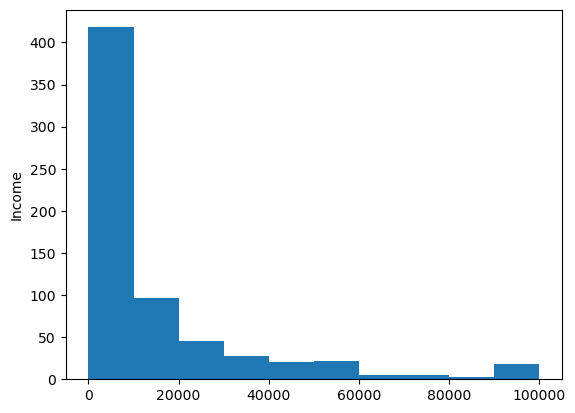

In [61]:
plt.hist(y)
plt.ylabel('Income')
plt.show()

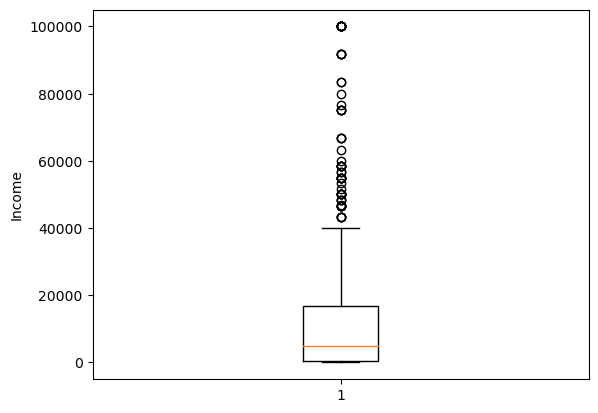

In [62]:
plt.boxplot(y)
plt.ylabel('Income')
plt.show()

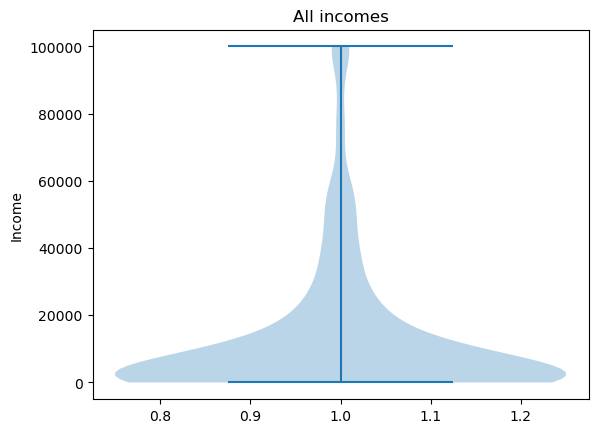

In [63]:
plt.violinplot(y)
plt.ylabel('Income')
plt.title('All incomes')
plt.show()

{'bodies': [<matplotlib.collections.PolyCollection at 0x1e6081ae810>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1e6081cf450>,
 'cmins': <matplotlib.collections.LineCollection at 0x1e60822fad0>,
 'cbars': <matplotlib.collections.LineCollection at 0x1e608239610>}

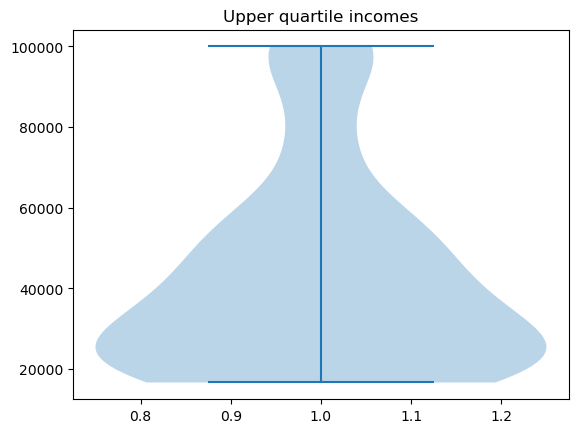

In [64]:
upper_q = df_musicians_target_averaged['Average annual income'].quantile(0.75)
upper_quartile_earners = [x for x in average_annual_income if x>upper_q]
plt.title('Upper quartile incomes')
plt.violinplot(upper_quartile_earners)

In [65]:
high_earners = [x for x in average_annual_income if x>=60000]
low_earners = [x for x in average_annual_income if x<=25000]

print(f'Number of musicians earning below £25,000: {len(low_earners)}')
print(f'Low earners as a percentage of the total number: {round((len(low_earners)/662)*100)}%')
print('')
print(f'Number of musicians earning above £60,000: {len(high_earners)}')
print(f'High earners as a percentage of the total number: {round((len(high_earners)/662)*100)}%')


print('')
print(f'Upper quartile: £{upper_q}')

Number of musicians earning below £25,000: 544
Low earners as a percentage of the total number: 82%

Number of musicians earning above £60,000: 31
High earners as a percentage of the total number: 5%

Upper quartile: £16667.75


The earnings given are low-end estimates, as the lowest of the range values was taken from the original income columns. There can be no accurate estimate of earnings above £100,000 per year, as the category was simply given as being any amount above £100,000. Therefore some high earners may be earning more than this.

Evidently the median annual earnings is somewhere around £8,000, with most musicians, some 400+ out of our total of 662 earning between £0 - £20,000, which would not be enough to live on.

The upper quartile is £16,668 (75% of all musicians earn less than this), though this may not be including everything above £40,000 as these are detected as outliers due to the high density of very low incomes. The violinplot clearly shows this density.

There does seem to be a jump from earning less that £60,000, to then earning £100,000+, with very few values in the middle.


## Feature and target correlations

First I'll explore the creatortype variables to see what correlation there is with income

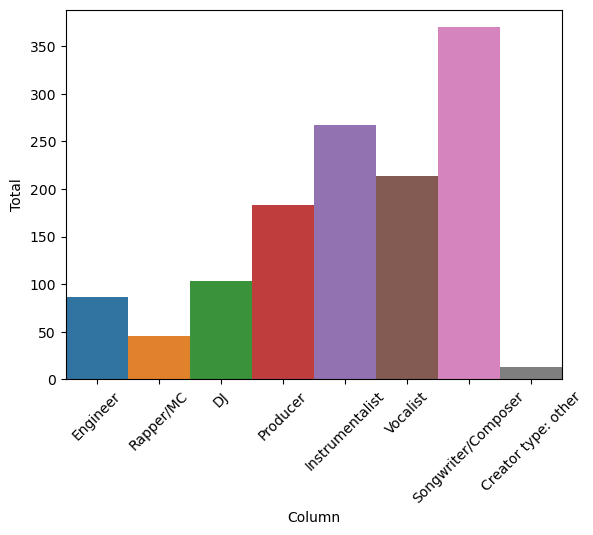

                Column  Total
0             Engineer     86
1            Rapper/MC     45
2                   DJ    103
3             Producer    183
4      Instrumentalist    267
5             Vocalist    214
6  Songwriter/Composer    370
7  Creator type: other     13


In [66]:
import seaborn as sns

value_totals = []
value_titles = []

for column in df_musicians_target_averaged.iloc[:,0:8]:
    value_titles.append(f'{column}')
    value_totals.append(df_musicians_target_averaged[column].sum())

df_value_totals = pd.DataFrame({'Column':[], 'Total':[]})
df_value_totals['Column'] = value_titles
df_value_totals['Total'] = value_totals

chart = sns.barplot(data=df_value_totals, x='Column', y='Total', width=1)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show(chart)

print(df_value_totals)

In [67]:
#For every column that has a 1 value, add the income to the total for that category
#Do this for all categories
#Divide each income figure by the number of true values in the corresponding category
#Chart the average incomes of each category        

column_names = []
total_income = ()
average_income = []

for column in df_musicians_target_averaged.iloc[:,0:8]:
    column_names.append(f'{column}')
    total_income = sum(df_musicians_target_averaged['Average annual income'][df_musicians_target_averaged[column]==1])
    average_income.append(round(total_income/df_musicians_target_averaged[column].sum()))

df_income_by_creatortype = pd.DataFrame({
    'Creator type': column_names,
    'Average income': average_income
})


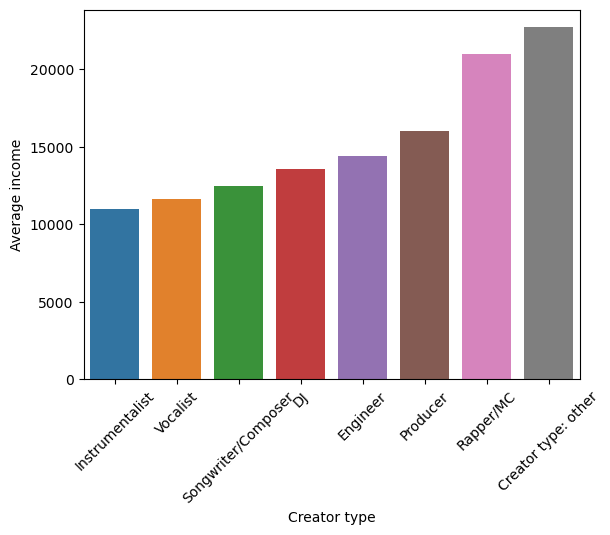

In [68]:
df_income_by_creatortype_sorted = df_income_by_creatortype.sort_values(['Average income'])


chart = sns.barplot(data=df_income_by_creatortype_sorted, x='Creator type', y='Average income')

chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show(chart)

In [69]:
other_respondents = df_musicians_target_averaged['Creator type: other'].sum()
print(f'Number of respondents in Other category: {other_respondents}')

Number of respondents in Other category: 13


There is some relationship between creatortype and income, with Rapper/MC respondents evidently earning the best out of all known categories, and 'other' being the highest of all. However, there are very few 'Other' respondents so this could be skewed by just a few high values.

I'm interested next in how much music contributes to income, and how that affects income

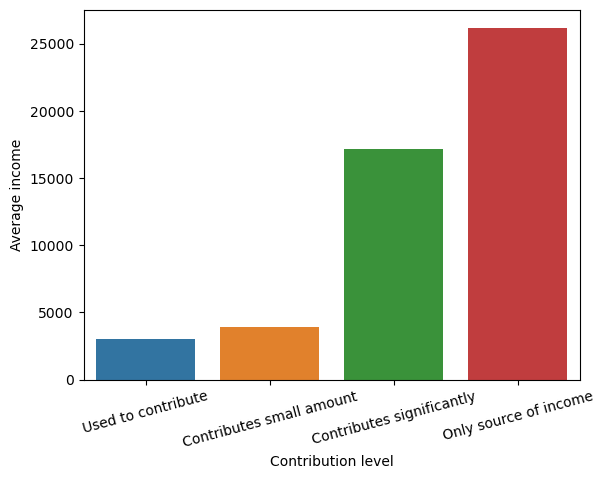

In [70]:
df_musicians_target_averaged['How much does music contribute to your income?'].nunique()


used_to_contribute = []
contributes_small_amount = []
contributes_significantly = []
only_source = []

for row in df_musicians_target_averaged.index:
    if df_musicians_target_averaged['How much does music contribute to your income?'].iloc[row] == 'Music used to contribute to my income but doesn\'t at the moment':
        used_to_contribute.append(df_musicians_target_averaged['Average annual income'].iloc[row])
    elif df_musicians_target_averaged['How much does music contribute to your income?'].iloc[row] == 'Music contributes a small amount to my income - I mostly rely on other forms of employment/income':
        contributes_small_amount.append(df_musicians_target_averaged['Average annual income'].iloc[row])
    elif df_musicians_target_averaged['How much does music contribute to your income?'].iloc[row] == 'Music contributes significantly to my income alongside other forms of employment/income':
        contributes_significantly.append(df_musicians_target_averaged['Average annual income'].iloc[row])
    elif df_musicians_target_averaged['How much does music contribute to your income?'].iloc[row] == 'Music is my only source of income':
        only_source.append(df_musicians_target_averaged['Average annual income'].iloc[row])

sum(used_to_contribute)/len(used_to_contribute)
sum(contributes_small_amount)/len(contributes_small_amount)
sum(contributes_significantly)/len(contributes_significantly)
sum(only_source)/len(only_source)

averages_by_category = {
    'Used to contribute': sum(used_to_contribute)/len(used_to_contribute),
    'Contributes small amount': sum(contributes_small_amount)/len(contributes_small_amount),
    'Contributes significantly': sum(contributes_significantly)/len(contributes_significantly),
    'Only source of income': sum(only_source)/len(only_source)
}

df_averages_by_category = pd.DataFrame(averages_by_category.items(), columns=['Contribution level','Average income'])

chart = sns.barplot(data=df_averages_by_category, x='Contribution level', y='Average income')
chart.set_xticklabels(chart.get_xticklabels(), rotation=15)
plt.show(chart)

In [71]:
print(f'Answered used to contribute: {len(used_to_contribute)}')
print(f'Answered contributes a small amount: {len(contributes_small_amount)}')
print(f'Answered contributes significantly: {len(contributes_significantly)}')
print(f'Answered music is my sole income: {len(only_source)}')

Answered used to contribute: 104
Answered contributes a small amount: 199
Answered contributes significantly: 171
Answered music is my sole income: 188


This is a more significant correlation, suggesting that musicians who rely on music more heavily as a source of income tend to earn more money. The number in each category is also quite evenly distributed, so the averages are likely to be fairly robust and not easily skewed by few values.

This could easily be simply as a result of the fact that the musicians who earn more are able to more heavily rely on music than others, thereby self-selecting

Next, I will ask whether the collaboration variable tracks to income.

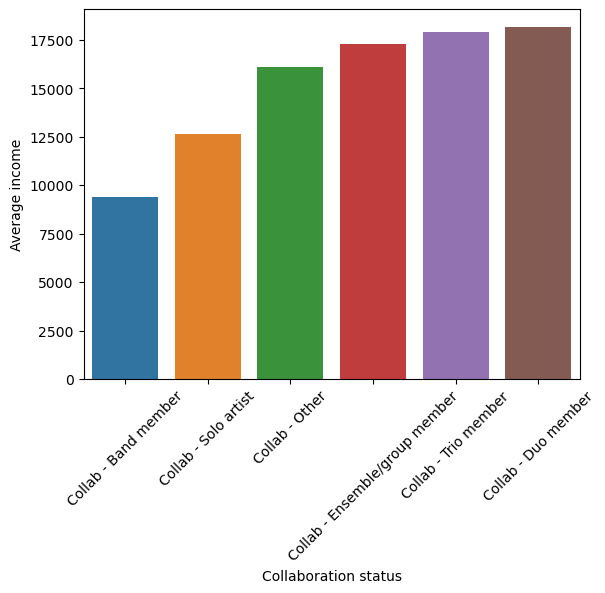

In [72]:
column_names = []
total_income = ()
average_income = []

for column in df_musicians_target_averaged.iloc[:,32:38]:
    column_names.append(f'{column}')
    total_income = sum(df_musicians_target_averaged['Average annual income'][df_musicians_target_averaged[column]==1])
    average_income.append(round(total_income/df_musicians_target_averaged[column].sum()))

df_income_by_collab = pd.DataFrame({
    'Collaboration status': column_names,
    'Average income': average_income
})

df_income_by_collab_sorted = df_income_by_collab.sort_values('Average income')

chart = sns.barplot(data=df_income_by_collab_sorted, x='Collaboration status', y='Average income')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show(chart)

Evidently, band member has the poorest outlook, whilst the top four categories have little difference between them, scoring roughly double that of band members on average. Solo artist is towards the middle of the average.

Next, I ask whether the amount of time spent working on music correlates with income. It would be most interesting if it did not, otherwise it may simply be a self-selection, as in the case of income reliance and total income.

However, it would at least suggest that, in general, a musician who spends a lot of time on music tends to earn more.

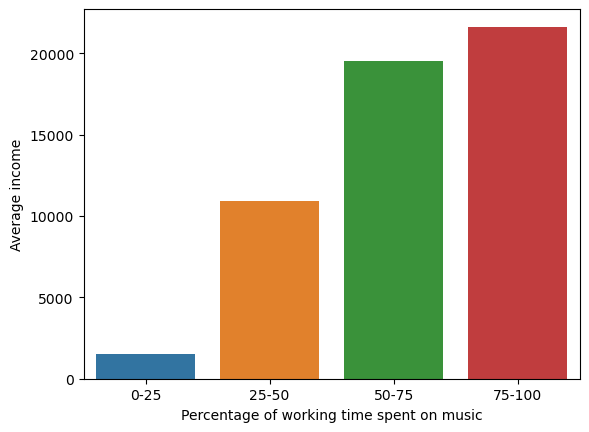

In [197]:
percentage_list = []
new_value = ()

for value in df_musicians_target_averaged['Percentage of working time spent on music in 2019']:
    value = value.replace(' (i.e. all of my work time)','')
    value = value.replace('Prefer not to say','')
    value = value.replace('%','')
    percentage_list.append(value)

percentage_series = pd.Series(percentage_list)
    
percentage_series = percentage_series.apply(pd.to_numeric, errors='coerce')

zero_to_twentyfive = []
twentyfive_to_fifty = []
fifty_to_seventyfive = []
seventyfive_to_hundred = []

for row in percentage_series.index:
    if percentage_series.iloc[row]<25:
        zero_to_twentyfive.append(df_musicians_target_averaged['Average annual income'].iloc[row])
    if 25<percentage_series.iloc[row]<50:
        twentyfive_to_fifty.append(df_musicians_target_averaged['Average annual income'].iloc[row])
    if 50<percentage_series.iloc[row]<75:
        fifty_to_seventyfive.append(df_musicians_target_averaged['Average annual income'].iloc[row])
    if 75<percentage_series.iloc[row]<=100:
        seventyfive_to_hundred.append(df_musicians_target_averaged['Average annual income'].iloc[row])

averages = []
        
averages.append(sum(zero_to_twentyfive)/len(zero_to_twentyfive))
averages.append(sum(twentyfive_to_fifty)/len(twentyfive_to_fifty))
averages.append(sum(fifty_to_seventyfive)/len(fifty_to_seventyfive))
averages.append(sum(seventyfive_to_hundred)/len(seventyfive_to_hundred))

df_music_time_vs_income = pd.DataFrame({
                                        'Percentage of working time spent on music':['0-25','25-50', '50-75', '75-100'],
                                        'Average income':averages, 
                                        
                                       })

chart = sns.barplot(data=df_music_time_vs_income, x='Percentage of working time spent on music', y='Average income')
chart.set_xticklabels(chart.get_xticklabels())
plt.show(chart)

### This final analysis step proved to challenging for me to complete

Finally, I'm interested in the income source percentages. A correlation would be interesting as it could point to the more and less lucrative sources of income.

In [195]:
#Where is that data exactly located
df_musicians_target_averaged.iloc[:,61:80]

1,2019 income source percentage - Live performances,2019 income source percentage - Audio streaming royalties,2019 income source percentage - Video streaming royalties,2019 income source percentage - Other online revenue (e.g. ads/promo etc.),2019 income source percentage - Digital sales (e.g. downloads),2019 income source percentage - Physical sales (e.g. CD and vinyl),2019 income source percentage - Brand/sponsorship deals,"2019 income source percentage - Direct licensing/sync (e.g. use of music in film, TV, games etc.)",2019 income source percentage - Session or orchestral work (e.g. studio recordings),"2019 income source percentage - Advances (e.g. against future recording, publishing royalties)",2019 income source percentage - Teaching music,2019 income source percentage - Broadcast (e.g. radio and TV use of your music),2019 income source percentage - Merchandise,2019 income source percentage - Mechanical royalties,2019 income source percentage - Public performance (e.g. music played in shops),"2019 income source percentage - Commissions for broadcast/other media (e.g. TV programmes, films, games)",2019 income source percentage - Commissions for stage (e.g. theatre productions),2019 income source percentage - Printed music sales/hire,2019 income source percentage - Other
0,70,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0
1,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,10,0,20,0,0,0,0,0,10,10,30,0,0,10,0,10,0
4,30,0,0,0,0,0,30,0,0,0,0,0,0,0,40,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
658,50,5,0,0,0,0,0,0,0,0,0,0,10,30,5,0,0,0,0
659,60,2,1,0,1,2,0,10,0,0,0,10,5,4,5,0,0,0,0
660,50,0,0,0,0,5,0,5,0,0,20,0,0,10,10,0,0,0,0


In [75]:
# I think I'll take the highest of the income sources, and take the average of all those who gave that answer as highest

#create a new column stating the highest income source

#for each colum:
#add the value to a variable
#if the value is higher than the last item in the variable,
#add the column title to the new list 'highest percentage income source'
'''
highest_income_source = []
highest = ()
list_names = df_musicians_target_averaged.iloc[:,61:80].columns
print(list_names)

my_dict = {}

for row in df_musicians_target_averaged.index:
    highest = max(df_musicians_target_averaged.iloc[row,61:80])
    column_with_highest = df_musicians_target_averaged.iloc[row,61:80].eq(highest)
    print(column_with_highest[column_with_highest==True])

for key in list_names.values:
    my_dict[key] = key
    
print(my_dict)
'''

'\nhighest_income_source = []\nhighest = ()\nlist_names = df_musicians_target_averaged.iloc[:,61:80].columns\nprint(list_names)\n\nmy_dict = {}\n\nfor row in df_musicians_target_averaged.index:\n    highest = max(df_musicians_target_averaged.iloc[row,61:80])\n    column_with_highest = df_musicians_target_averaged.iloc[row,61:80].eq(highest)\n    print(column_with_highest[column_with_highest==True])\n\nfor key in list_names.values:\n    my_dict[key] = key\n    \nprint(my_dict)\n'

In [76]:
#This gives me indices so that I can refer to columns by index instead of typing full names
'''
column_names =  df_musicians_target_averaged.columns
for i in column_names:
    print(column_names.get_loc(i))
    print(i)
'''

'\ncolumn_names =  df_musicians_target_averaged.columns\nfor i in column_names:\n    print(column_names.get_loc(i))\n    print(i)\n'

## Model selection and training

Can I train a simple linear regression on only the columns containing numeric data, without feature selection?

In [77]:
numeric_columns = df_musicians_target_averaged.select_dtypes(include=['number'])
non_numeric_columns = df_musicians_target_averaged.select_dtypes(include=['object'])

#print(non_numeric_columns.columns)

In [78]:
#That's tricky given the number of non-numeric columns that I'd need to sort out.
#Can I do some simple numeric conversion, and then try?

In [79]:
df_musicians_target_numeric = df_musicians_target_averaged.apply(pd.to_numeric, errors='ignore')

df_musicians_target_numeric.info()
    
#numeric_df = pd.to_numeric(df_musicians_target_averaged, errors='ignore')
#numeric_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Columns: 132 entries, Engineer to Average annual income
dtypes: float64(25), int64(25), object(31), uint8(51)
memory usage: 452.0+ KB


In [80]:
numeric_columns = df_musicians_target_numeric.select_dtypes(include=['number'])
non_numeric_columns = df_musicians_target_numeric.select_dtypes(include=['object'])

df_musicians_target_cheapnumeric = numeric_columns
df_musicians_target_cheapnumeric['Main royalty rate'].fillna(0, inplace=True)

len(df_musicians_target_cheapnumeric.columns)
len(non_numeric_columns.columns)


print(f'Proportion of features retained in the cheapnumeric dataset: {len(df_musicians_target_cheapnumeric.columns)/len(df_musicians_target_averaged.columns)}')


Proportion of features retained in the cheapnumeric dataset: 0.7651515151515151


In [81]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20)

In [82]:
X,y = df_musicians_target_cheapnumeric.drop('Average annual income', axis=1),df_musicians_target_averaged['Average annual income']

In [83]:
X_pca = pca.fit_transform(X)

In [84]:
print(pca.explained_variance_ratio_)

[0.23267622 0.13276163 0.07714026 0.06951619 0.06013762 0.03200754
 0.02927421 0.02745696 0.02644393 0.02238189 0.02186785 0.01983118
 0.01942644 0.01807936 0.01626255 0.01490392 0.01439095 0.01381545
 0.01307974 0.0128206 ]


In [85]:
#PCA seems to show just five principal components account for >6% of the explained variance each

In [86]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

In [87]:
print(pca.explained_variance_ratio_)

[0.23267622 0.13276163 0.07714026 0.06951619 0.06013762]


The PCA shows that I may have a lot of noisy data that doesn't particularly correlate to the target variable. This may be a problem going forward.

In [89]:
'''
This was to check after an error was thrown that my columns were inconsistent lengths. The solution was to reset the index.

for column in df_musicians_target_cheapnumeric.columns:
    print(len(df_musicians_target_cheapnumeric[column]))'''

'\nThis was to check after an error was thrown that my columns were inconsistent lengths. The solution was to reset the index.\n\nfor column in df_musicians_target_cheapnumeric.columns:\n    print(len(df_musicians_target_cheapnumeric[column]))'

In [90]:
#I'll try a baseline linear regression model before anything else

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

lr_model = LinearRegression()

X,y = df_musicians_target_cheapnumeric.drop('Average annual income', axis=1),df_musicians_target_cheapnumeric['Average annual income']

scaler=StandardScaler()
#X_scaled = scaler.fit_transform(X)
#X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, random_state=42, test_size=0.2)

#the above throws an inconsistent length error. Get rid of the scaler and try:

'''
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
model.fit(X_train, y_train)
'''

#that works, now reintroduce scaling:
X_scaled = scaler.fit_transform(X)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, random_state=42, test_size=0.2)

lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [91]:
from sklearn.metrics import mean_squared_error
lr_prediction_test = lr_model.predict(X_test_scaled)
print(f'Mean squared error: {mean_squared_error(y_test, lr_prediction_test)}')

Mean squared error: 384750645.30806094


In [92]:
lr_test_outputs = pd.DataFrame()
lr_test_outputs['True values'] = y_test
lr_test_outputs['Predicted values'] = lr_prediction_test

value_difference = []

lr_test_outputs.index = range(len(lr_test_outputs.index))

for row in lr_test_outputs.index:
    value_difference.append(abs(lr_test_outputs['Predicted values'].iloc[row]-lr_test_outputs['True values'].iloc[row]))

lr_test_outputs['Difference'] = value_difference
    
print(lr_test_outputs)


     True values  Predicted values    Difference
0         2334.0      12334.254844  10000.254844
1        23334.0      33042.254844   9708.254844
2        40001.0       5946.254844  34054.745156
3         2334.0      10060.254844   7726.254844
4        26668.0      28730.254844   2062.254844
..           ...               ...           ...
128       6668.0      23210.254844  16542.254844
129       2001.0      10618.254844   8617.254844
130      13334.0       2206.254844  11127.745156
131      23334.0      17154.254844   6179.745156
132          0.0     -10909.745156  10909.745156

[133 rows x 3 columns]


Clearly the model is performing poorly with a high MSE.

However, MSE would be high given that the numbers in the target variable are quite large, so the MSE will quickly run away.  
Root Mean Squared Error might be more useful in this case. I will rerun with RMSE.

In [148]:
from sklearn.metrics import mean_squared_error
lr_prediction_test = lr_model.predict(X_test_scaled)

LR_RMSE = mean_squared_error(y_test, lr_prediction_test, squared=False) 
LR_max_predicted_value = max(lr_prediction_test)

print('Model performance on test data')
print(f'Root mean squared error: £{mean_squared_error(y_test, lr_prediction_test, squared=False)}')
print(f'Max value predicted by model: £{max(lr_prediction_test)}')

Model performance on test data
Root mean squared error: £19615.061695239732
Max value predicted by model: £57518.25484404537


In [119]:
from sklearn.metrics import mean_squared_error
lr_train_test = lr_model.predict(X_train_scaled)
print('Model performance on training data')
print(f'Root mean squared error: £{mean_squared_error(y_train, lr_train_test, squared=False)}')
print(f'Max value predicted by model: £{max(lr_train_test)}')

Model performance on training data
Root mean squared error: £16317.989215698131
Max value predicted by model: £76922.25484404537


The RMSE is clearer.  
I don't see evidence of overfitting from these scores.  


Does it perform just as well on high and low incomes?

I could try a polynomial regression to improve predictions if it gets worse at higher incomes.  

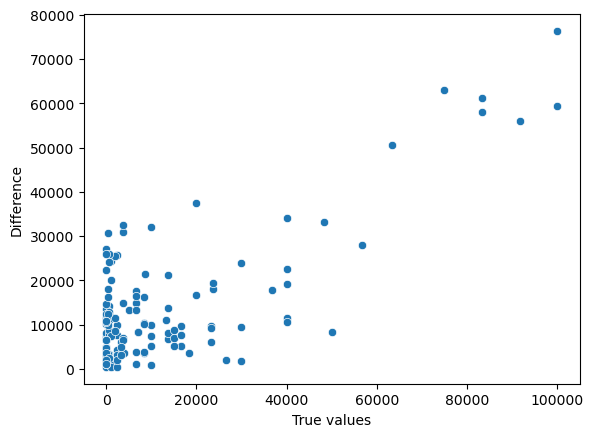

In [95]:
x_plot = lr_test_outputs['True values']
y_plot = lr_test_outputs['Difference']

sns.scatterplot(x=x_plot, y=y_plot)
plt.show()

Evidently, as the true value increases, the difference between the predicted and the actual value increases. This may be simply a factor of the model making roughly the same degree of error, but amplified because of the higher value.

Performance seems poor at all scales, with the model essentially never correctly predicting high values and predicting low values poorly.

In [96]:
pd.set_option('display.max_rows',500)
lr_test_outputs

,True values,Predicted values,Difference
0,2334.0,12334.254844,10000.254844
1,23334.0,33042.254844,9708.254844
2,40001.0,5946.254844,34054.745156
3,2334.0,10060.254844,7726.254844
4,26668.0,28730.254844,2062.254844
5,668.0,-661.745156,1329.745156
6,1.0,-2193.745156,2194.745156
7,40001.0,28506.254844,11494.745156
8,6668.0,24290.254844,17622.254844
9,1.0,10050.254844,10049.254844


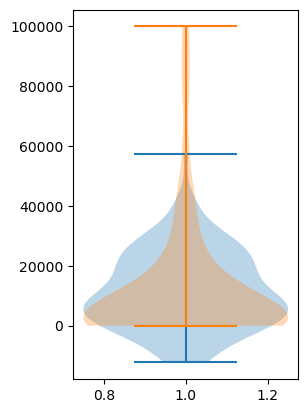

In [169]:
lr_model_plot = plt.subplot(1,2,1)
plt.violinplot(lr_test_outputs['Predicted values'])

plt.subplot(1,2,1)
plt.violinplot(lr_test_outputs['True values'])

plt.show(lr_model_plot)

The above shows that the model is overestimating the number of values in the middle income range, and never predicting any above £60,000.

It predicts negative incomes, which is clearly an error.



In [98]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2, include_bias=False)
pr_model = LinearRegression()
poly_X_scaled = poly.fit_transform(X_scaled)

X_train_poly, X_test_poly, y_train, y_test = train_test_split(poly_X_scaled, y, random_state=42, test_size=0.2)

pr_model.fit(X_train_poly, y_train)

LinearRegression()

In [164]:
from sklearn.metrics import mean_squared_error
pr_train_test = pr_model.predict(X_train_poly)
PR_training_RMSE = mean_squared_error(y_train, pr_train_test, squared=False)
print('Model performance on training data')
print(f'Polynomial regression RMSE on training dataset: {RMSE:.10f}')
print(f'Max value predicted by model: £{max(pr_train_test)}')

Model performance on training data
Polynomial regression RMSE on training dataset: 19391.3807621046
Max value predicted by model: £100000.00000000096


In [147]:
from sklearn.metrics import mean_squared_error
pr_prediction_test = pr_model.predict(X_test_poly)

PR_RMSE = mean_squared_error(y_test, pr_prediction_test, squared=False)
PR_max_predicted_value = max(pr_prediction_test)

print('Model performance on test data')
print(f'Polynomial regression RMSE on test dataset: £{RMSE:.10f}')
print(f'Max value predicted by model: £{max(pr_prediction_test)}')

Model performance on test data
Polynomial regression RMSE on test dataset: £19391.3807621046
Max value predicted by model: £47252.116892838916


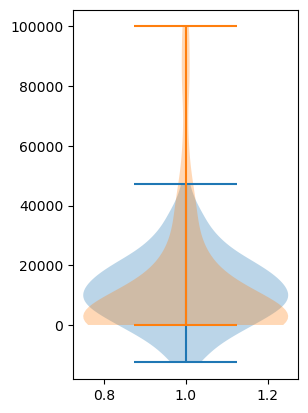

In [184]:
plt.subplot(1,2,1)
plt.violinplot(pr_prediction_test)

plt.subplot(1,2,1)
plt.violinplot(y_test)

plt.show()


This now performs almost perfectly on the test data, and more poorly than before on the test data. Presumably this is an overfitting problem, perhaps due to the high number of features.

The model improves on the linear regression model in predicting fewer middle incomes.

It still predicts negative values.

Currently, these models are not performing well enough to be at all predictive. I will test an alternative baseline model.

### Baseline model alternative: Support Vector Regression

In [192]:
import sklearn
from sklearn.svm import SVR

svc_model = SVR(kernel='rbf',C=50000)
svc_model.fit(X_train_scaled, y_train)

SVR(C=50000)

In [193]:
SVM_prediction_test = svc_model.predict(X_test_scaled)
print('Model performance on test data')
print(f'SVM root mean squared error: £{mean_squared_error(y_test, SVM_prediction_test, squared=False)}')

Model performance on test data
SVM root mean squared error: £19391.380762104618


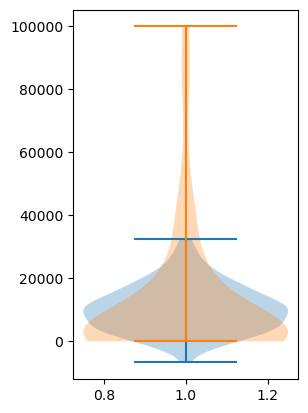

In [194]:
plt.subplot(1,2,1)
plt.violinplot(SVM_prediction_test)

plt.subplot(1,2,1)
plt.violinplot(y_test)

plt.show()


In [139]:
import math

SVM_test_outputs = pd.DataFrame()

SVM_test_outputs['True y'] = y_test
#works
SVM_test_outputs['Predicted values'] = SVM_prediction_test

value_difference = []

SVM_test_outputs.index = range(len(SVM_test_outputs.index))

for row in SVM_test_outputs.index:
    value_difference.append(abs(SVM_test_outputs['Predicted values'].iloc[row]-SVM_test_outputs['True y'].iloc[row]))

SVM_test_outputs['Difference'] = value_difference

SVM_max_predicted_value = max(SVM_test_outputs['Predicted values'])
SVM_RMSE = math.sqrt(mean_squared_error(y_test, SVM_prediction_test))

print(f'Max value predicted by model: £{SVM_max_predicted_value}')
print(f'SVM root mean squared error: £{SVM_RMSE}')

SVM_test_outputs

Max value predicted by model: £32589.212214825002
SVM root mean squared error: £19391.380762104618


,True y,Predicted values,Difference
0,2334.0,6593.645165,4259.645165
1,23334.0,18539.269561,4794.730439
2,40001.0,5964.637480,34036.362520
3,2334.0,11330.065862,8996.065862
4,26668.0,15253.931806,11414.068194
5,668.0,4034.597498,3366.597498
6,1.0,-702.602626,703.602626
7,40001.0,18051.576529,21949.423471
8,6668.0,16386.202013,9718.202013
9,1.0,11853.725690,11852.725690


### Summary of all model performance

In [165]:
model_results = {'Model RMSE scores':[LR_RMSE, PR_RMSE, SVM_RMSE],
                    'Model max values predicted':[LR_max_predicted_value, PR_max_predicted_value, SVM_max_predicted_value]
                   }

df_model_results = pd.DataFrame(model_results, index=['Linear Regression','Polynomial Regression','Support Vector Regression'])
display(df_model_results)
print(f'Polynomial Regression Training data RMSE: £{PR_training_RMSE:.10f}')

,Model RMSE scores,Model max values predicted
Linear Regression,19615.061695,57518.254844
Polynomial Regression,19857.563253,47252.116893
Support Vector Regression,19391.380762,32589.212215


Polynomial Regression Training data RMSE: £0.0000000001


Models scored roughly equally on RMSE scores on test data. The Linear Regression model was better in that it did predict some higher incomes, though it still fails to predict incomes up to the level seen in the actual test data, where £100,000 is the maxiumum. The other models tend to more greatly underestimate incomes.

The Polynomial Regression model seems to suffer greatly from overfitting, evidenced by the almost perfect RMSE score on the test data.

## Summary of project and next steps

So far, none of the models have been able to make accurate predictions on test data. They all fail to estimate the higher incomes, sometimes estimate negative incomes, and predict the rest with poor accuracy.

The EDA could at least partly fulfil the goal of providing information for expectation-management, as I have been able to show that overall, many musicians are evidently earning very little. However, there are also some more specific findings in my EDA, a notable example being that band members on average earn the least, solo artists middle, and duo members the most.

Also of interest is that both the percentage of working time spent on music, and the reliance on music as a sourcec of income, show strong positive correlations with average income. It would be worth exploring the direction of causation here - does more time spent on music, and a greater reliance on it, mean a higher average income, or vice-versa?

Unfortunately, whilst in my EDA I was able to identify some categories which seemed to correlate, these were not always included in the model training and test data as formatting them for training would have required further work, which proved beyond the timescale of this project.

Whilst these correlations also looked promising in EDA, there is risk that they wouldn't have held in the model training as they could easily potentially confound each other. So it is too early to say whether a musician's income can in fact be predicted from this dataset at all.

As a next step, I would return to the EDA and feature-selection stage to narrow down the number of features, as I feel that this would improve the models' performance.

If this still did not yield good results, I would also consider reframing the problem as a classification problem, perhaps setting a threshold from income at the UK living wage. This could be an easier problem for the models to approach, particularly as they do seem able to predict the rough shape of the data, though the values predicted are inaccurate.